In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x = df.iloc[:,2:4].values
y = df.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
x_sc = StandardScaler()
x_train = x_sc.fit_transform(x_train)
x_test = x_sc.transform(x_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
ypred = classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_test,y_pred=ypred)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

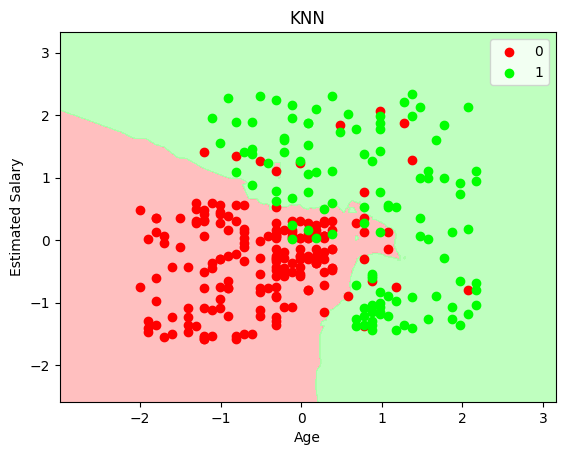

In [13]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
# Create color maps
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00'])
# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
# Set the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
# Add title and labels
plt.title('KNN')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# Show the plot
plt.show()

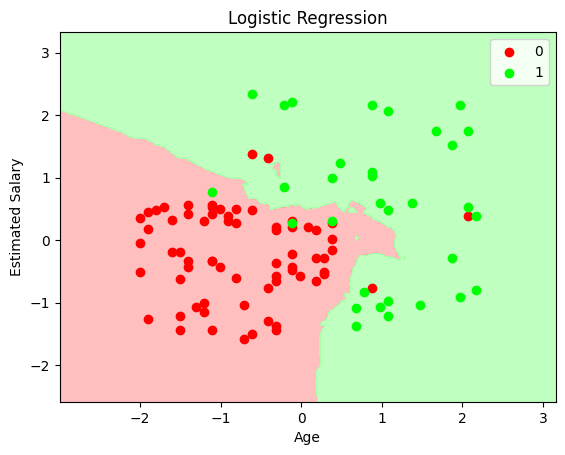

In [14]:
# Visualizing the results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
# Create a meshgrid for plotting the decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)
# Create color maps
cmap_fill = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_markers = ListedColormap(['#FF0000', '#00FF00'])
# Plot the decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, cmap=cmap_fill)
# Set the limits of the plot
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c=[cmap_markers(i)], label=j)
# Add title and labels
plt.title('Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
# Show the plot
plt.show()